In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
%matplotlib inline

In [2]:
df = pd.read_csv("./4-Algerian_forest_fires_dataset.csv")
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [5]:
df[df.isnull().any(axis=1)] # null olan değerler

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df.drop(122, inplace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
df[df.isnull().any(axis=1)] # null olan değerler

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.loc[:123, "Region"] = 0
df.loc[123:, "Region"] = 1

In [9]:
print(df.head())
print(df.tail())

  day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire        0.0  
1  not fire        0.0  
2  not fire        0.0  
3  not fire        0.0  
4  not fire        0.0  
    day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.9+ KB


In [11]:
df = df.dropna().reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
df.columns = df.columns.str.strip()

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
204,22,8,2012,37,53,14,0,89.5,41.1,127.5,8,45.5,18.1,fire,1.0
234,21,9,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire,1.0
222,9,9,2012,30,80,15,0,83.1,7.9,34.5,3.5,10,3.7,fire,1.0
182,31,7,2012,37,55,15,0,89.3,28.3,67.2,8.3,28.3,14.5,fire,1.0
114,23,9,2012,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,not fire,0.0
226,13,9,2012,29,49,19,0,88.6,11.5,33.4,9.1,12.4,10.3,fire,1.0
78,18,8,2012,36,54,18,0,89.4,20,110.9,9.7,27.5,16.1,fire,0.0
236,23,9,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,1.0
201,19,8,2012,35,66,15,0.1,82.7,32.7,96.8,3.3,35.5,7.7,fire,1.0
196,14,8,2012,37,40,13,0,91.9,22.3,55.5,10.8,22.3,15.7,fire,1.0


In [17]:
# df[["day","month","year","Temperature","RH","Ws"]] = df[["day","month","year","Temperature","RH","Ws"]].astype(dtype=int)

In [18]:
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [19]:
df[df["day"]=="day"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [20]:
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [21]:
df.drop(122,axis=0,inplace=True)

In [22]:
df[["day","month","year","Temperature","RH","Ws"]] = df[["day","month","year","Temperature","RH","Ws"]].astype(dtype=int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 30.4+ KB


In [24]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [25]:
df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]] = df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 30.4+ KB


In [27]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [28]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [29]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [30]:
df["Classes"].unique()

array([0, 1])

In [31]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

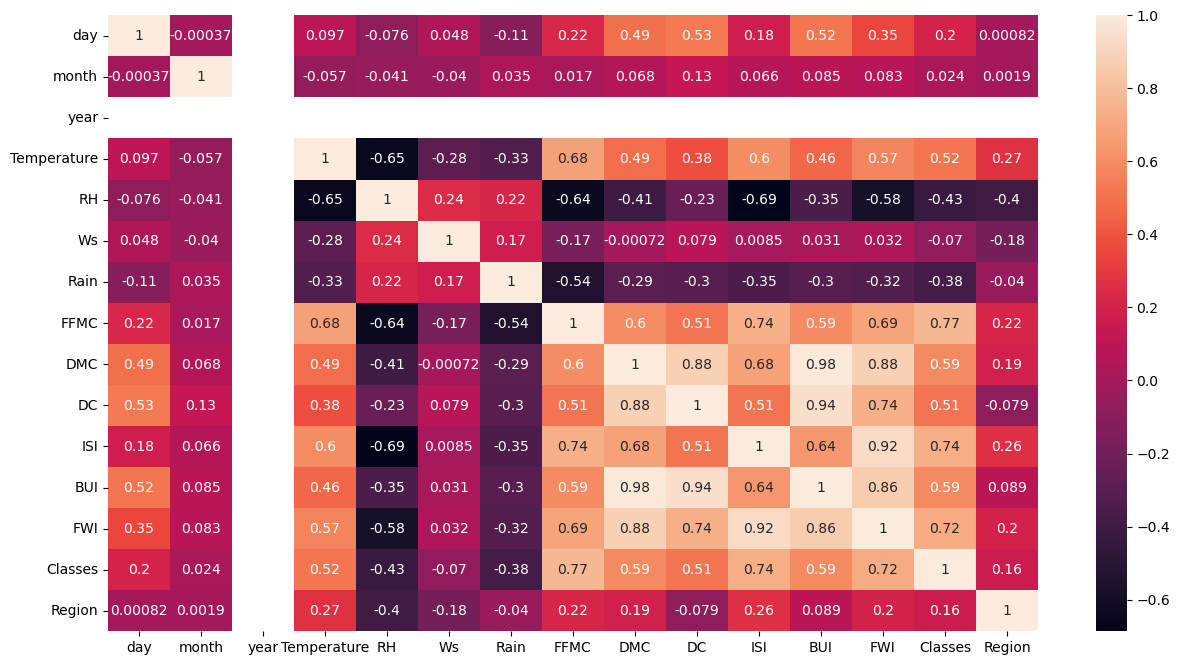

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [33]:
df.drop(["day","month","year"],axis=1,inplace=True)
df.sample(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
89,35,48,18,0.0,90.1,54.2,220.4,12.5,67.4,30.2,1,0.0
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0.0
64,34,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1,0.0
29,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,1,0.0
56,36,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3,1,0.0
59,31,79,15,0.0,85.4,28.5,136.0,4.7,37.4,10.7,1,0.0
35,32,63,14,0.0,87.0,10.9,37.0,5.6,12.5,6.8,1,0.0
196,37,40,13,0.0,91.9,22.3,55.5,10.8,22.3,15.7,1,1.0
28,32,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,0,0.0
49,33,65,15,0.1,81.4,12.3,62.1,2.8,16.5,4.0,1,0.0


In [34]:
X = df.drop("FWI",axis=1)
y = df["FWI"]

In [35]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1.0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1.0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1.0


In [36]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 243, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=15)

In [38]:
X_train.shape

(182, 11)

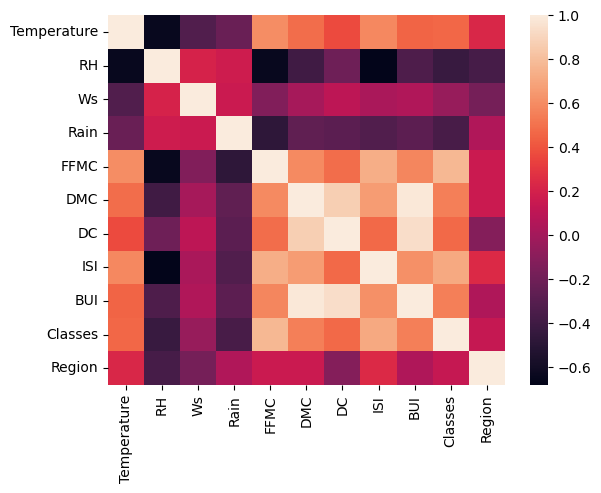

In [39]:
sns.heatmap(data=X_train.corr())
plt.show()

In [40]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644824,-0.322405,-0.222809,0.600615,0.483815,0.362859,0.579809,0.452819,0.463959,0.229479
RH,-0.644824,1.000000,0.205669,0.171031,-0.643767,-0.395535,-0.204568,-0.682107,-0.337032,-0.427947,-0.368402
Ws,-0.322405,0.205669,1.000000,0.152948,-0.135584,0.011874,0.104577,0.021616,0.051452,-0.044791,-0.181246
Rain,-0.222809,0.171031,0.152948,1.000000,-0.475600,-0.263007,-0.282983,-0.325552,-0.276457,-0.363013,0.049735
FFMC,0.600615,-0.643767,-0.135584,-0.475600,1.000000,0.592446,0.483610,0.732549,0.577031,0.770641,0.158505
DMC,0.483815,-0.395535,0.011874,-0.263007,0.592446,1.000000,0.871387,0.658793,0.980646,0.549624,0.153781
DC,0.362859,-0.204568,0.104577,-0.282983,0.483610,0.871387,1.000000,0.467977,0.939248,0.468011,-0.120874
ISI,0.579809,-0.682107,0.021616,-0.325552,0.732549,0.658793,0.467977,1.000000,0.617313,0.714801,0.241664
BUI,0.452819,-0.337032,0.051452,-0.276457,0.577031,0.980646,0.939248,0.617313,1.000000,0.550431,0.044453
Classes,0.463959,-0.427947,-0.044791,-0.363013,0.770641,0.549624,0.468011,0.714801,0.550431,1.000000,0.136752


In [41]:
def correlation_for_dropping(df,threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if(abs(corr.iloc[i,j]) > threshold):
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [42]:
columns_dropping = correlation_for_dropping(X_train,0.85)
columns_dropping

{'BUI', 'DC'}

In [43]:
X_train.drop(columns_dropping,axis=1,inplace=True)
X_test.drop(columns_dropping,axis=1,inplace=True)

In [44]:
X_train.shape

(182, 9)

In [45]:
X_test.shape

(61, 9)

In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

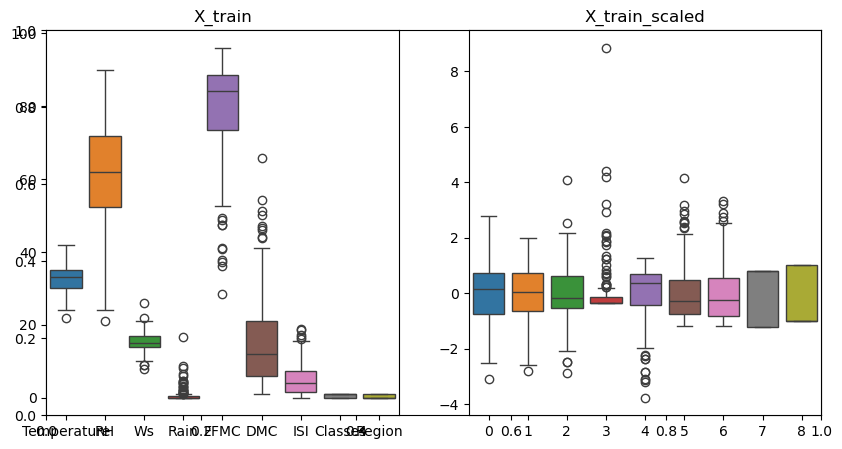

In [48]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [49]:
lin_reg = LinearRegression()

In [50]:
lin_reg.fit(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)

In [51]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ",mae)
print("MSE: ",mse)
print("R2 Score: ",r2)

MAE:  0.7036011729575915
MSE:  0.8764163698605975
R2 Score:  0.9838729275348057


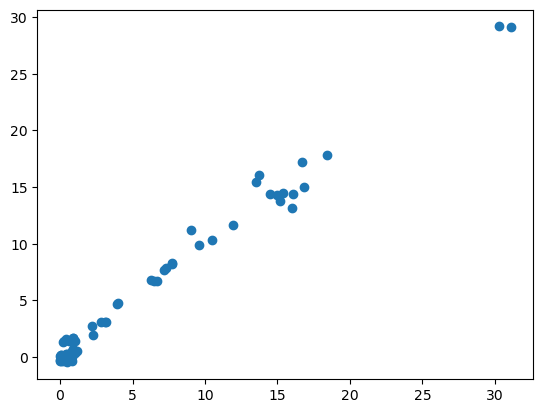

In [52]:
plt.scatter(x=y_test, y=y_pred)
plt.show()

MAE:  1.2162726338006296
MSE:  2.6029377368132205
R2 Score:  0.9521029422229386


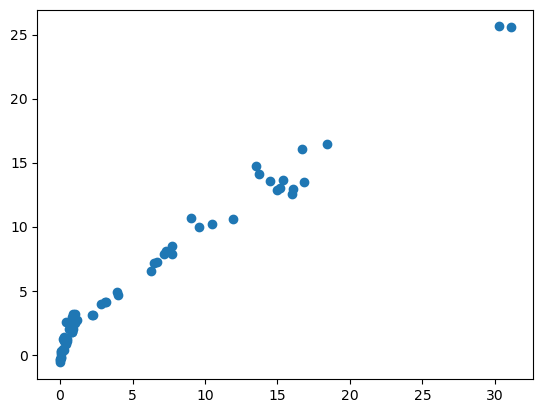

In [53]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE: ",mae)
print("MSE: ",mse)
print("R2 Score: ",r2)
plt.scatter(x=y_test,y=y_pred)
plt.show()

MAE:  0.7093542448703309
MSE:  0.8868348464263068
R2 Score:  0.9836812155445575


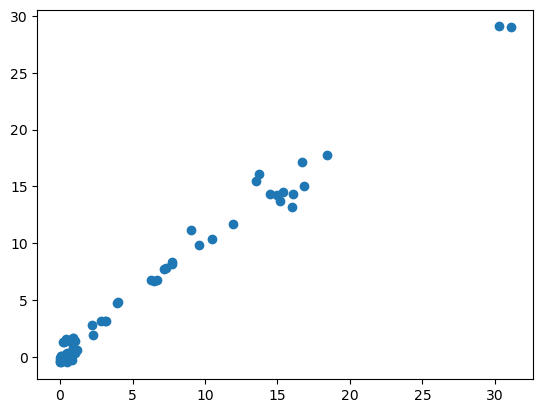

In [54]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE: ",mae)
print("MSE: ",mse)
print("R2 Score: ",r2)
plt.scatter(x=y_test,y=y_pred)
plt.show()

MAE:  1.7493286471090155
MSE:  5.569160502382822
R2 Score:  0.8975210207375393


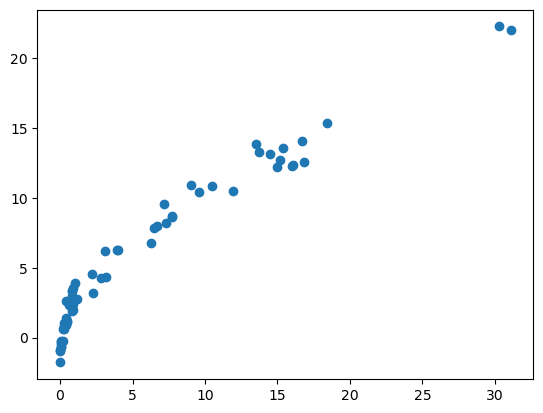

In [55]:
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE: ",mae)
print("MSE: ",mse)
print("R2 Score: ",r2)
plt.scatter(x=y_test,y=y_pred)
plt.show()

In [57]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)
y_pred = lasso_cv.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", r2)

MSE:  0.8972011670293638
MAE:  0.722230815630542
R2 Score:  0.9834904632842026


In [58]:
lasso_cv.alpha_

np.float64(0.0315484751185951)

In [59]:
lasso_cv.alphas_

array([6.79691292, 6.33882374, 5.91160823, 5.51318562, 5.14161537,
       4.7950877 , 4.47191484, 4.17052274, 3.88944347, 3.627308  ,
       3.38283958, 3.15484751, 2.94222135, 2.74392548, 2.55899408,
       2.38652645, 2.22568255, 2.075679  , 1.93578518, 1.80531974,
       1.68364723, 1.57017504, 1.4643505 , 1.36565818, 1.27361739,
       1.18777984, 1.10772745, 1.03307033, 0.96344485, 0.89851189,
       0.83795519, 0.78147982, 0.72881069, 0.67969129, 0.63388237,
       0.59116082, 0.55131856, 0.51416154, 0.47950877, 0.44719148,
       0.41705227, 0.38894435, 0.3627308 , 0.33828396, 0.31548475,
       0.29422213, 0.27439255, 0.25589941, 0.23865264, 0.22256826,
       0.2075679 , 0.19357852, 0.18053197, 0.16836472, 0.1570175 ,
       0.14643505, 0.13656582, 0.12736174, 0.11877798, 0.11077275,
       0.10330703, 0.09634448, 0.08985119, 0.08379552, 0.07814798,
       0.07288107, 0.06796913, 0.06338824, 0.05911608, 0.05513186,
       0.05141615, 0.04795088, 0.04471915, 0.04170523, 0.03889

In [61]:
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled,y_train)
y_pred = ridge_cv.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE: ",mse)
print("MAE: ",mae)
print("R2 Score: ",r2)

MSE:  0.8868348464263068
MAE:  0.7093542448703309
R2 Score:  0.9836812155445575


In [64]:
elasticnet_cv = ElasticNetCV(cv=5)
elasticnet_cv.fit(X_train_scaled,y_train)
y_pred = elasticnet_cv.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE: ", mse)
print("MAE: ",mae)
print("R2 Score: ",r2)

MSE:  0.9249125778630383
MAE:  0.7354284604918181
R2 Score:  0.9829805413498388
